<a href="https://colab.research.google.com/github/thngph/Diffie_Hellman/blob/main/HCMCPolygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Author: Ngô Phước Thịnh
ID: 19520981
email: 19520981@gm.uit.edu.vn
       ngophuocthinh28@gmail.com
```



![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Ho_Chi_Minh_City_Skyline_%28night%29.jpg/1920px-Ho_Chi_Minh_City_Skyline_%28night%29.jpg)

# THU THẬP DỮ LIỆU TỌA ĐỘ CÁC ĐỈNH CỦA ĐA GIÁC TẠO THÀNH BẢN ĐỒ TP.HCM


Link tới Notebook: [Google Colab](https://colab.research.google.com/drive/1TC0gtJNAE_wTl4UeNqBBvzV2UlGpGFx0?usp=sharing)

Nguồn dữ liệu: [OpenStreetMap](https://www.openstreetmap.org/)

#Python script

In [ ]:
import requests
import pandas as pd

RELATION_ID = "1973756"
URL = "http://polygons.openstreetmap.fr/get_geojson.py?id="

In [ ]:
'''
get_polygon(relation_id, URL)
receives relation_id and return an xlsx file contains the multipolygon coordinates of the place having that relation_id
parameters:
  relation_id: the id of the place retrieved from https://www.openstreetmap.org/
  URL (default="http://polygons.openstreetmap.fr/get_geojson.py?id="): URL to site returning GeoJSON file of the relation_id
'''
def get_polygon(relation_id, URL = "http://polygons.openstreetmap.fr/get_geojson.py?id="):
  response = requests.get(URL+relation_id)
  focused_data = response.json()["geometries"][0]["coordinates"][0][0]
  data = pd.DataFrame(focused_data, columns=["Kinh độ", "Vĩ độ"])
  try:
    data.to_excel("HCM-multipolygon.xlsx", index=False)
    return "Xuất file thành công!"
  except:
    return "Có lỗi xảy ra, hãy kiểm tra" 

In [ ]:
get_polygon(RELATION_ID)

'Xuất file thành công!'

#Giải thích cách thu thập dữ liệu

Truy cập vào [OpenStreetMap](https://www.openstreetmap.org/), tìm địa điểm là *Ho Chi Minh City* để lấy *id* của khu vực này.
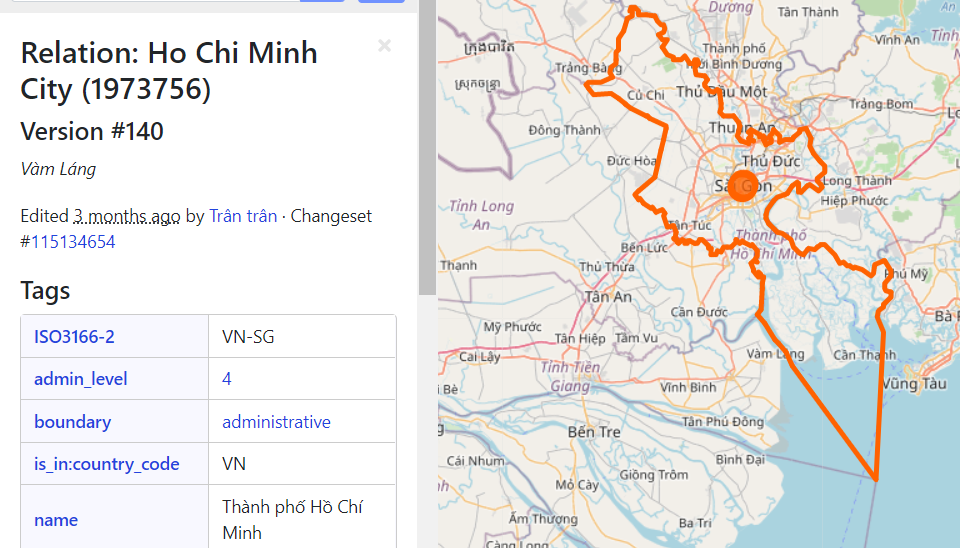


Sau khi có *id* của *TPHCM*, ta nhập *id* trên vào [https://polygons.openstreetmap.fr/](https://polygons.openstreetmap.fr/), chọn file type là GeoJSON.
Kết quả trả về có dạng như ảnh dưới.
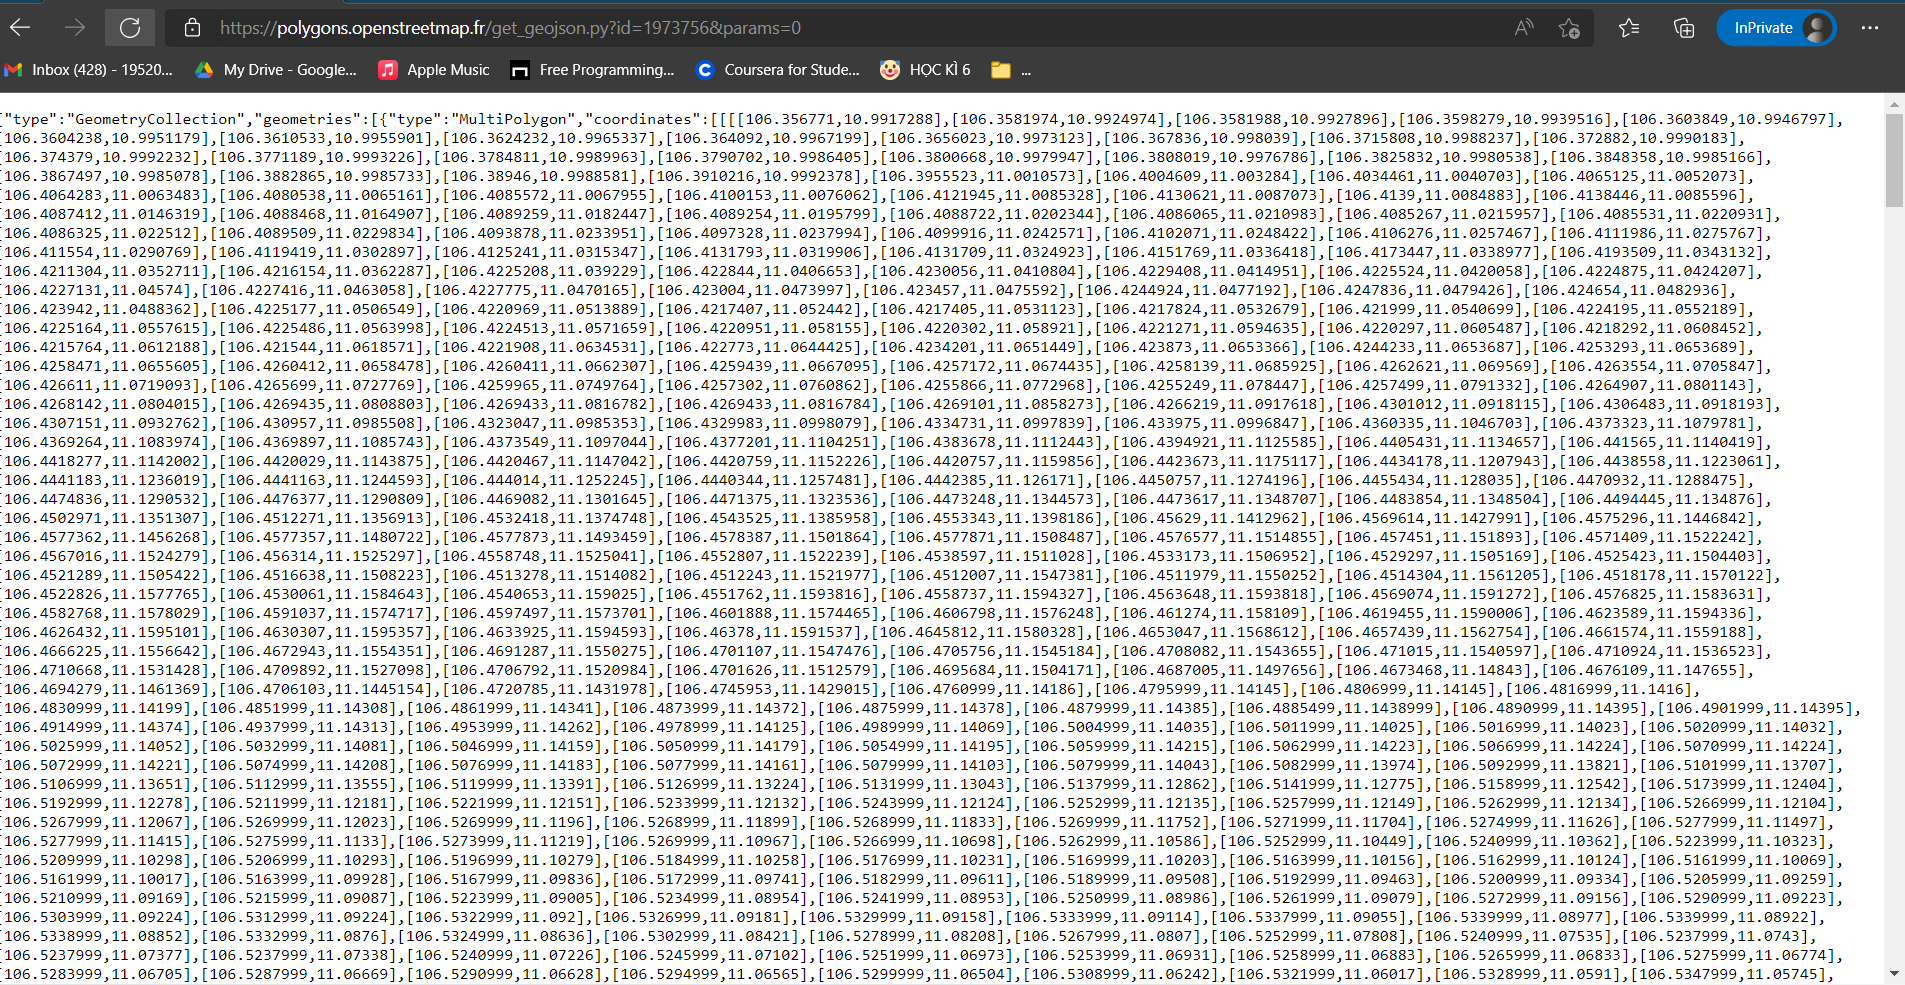

Từ kết quả này có thể xử lí thủ công để được file data, hoặc sử dụng Python để trích xuất dữ liệu.

Nhận thấy URL là https://polygons.openstreetmap.fr/get_geojson.py?id=1973756&params=0, có dạng https:// polygons.openstreetmap.fr/get_geojson.py?id= + RELATION_ID + &params=0 (optional)

In [ ]:
import requests
import pandas as pd

In [ ]:
RELATION_ID = "1973756"
URL = "http://polygons.openstreetmap.fr/get_geojson.py?id="

In [ ]:
r = requests.get(URL+RELATION_ID)

In ra thử nội dung API trả về (in thuộc tính content để dễ nhìn).

In [ ]:
r.content

b'{"type":"GeometryCollection","geometries":[{"type":"MultiPolygon","coordinates":[[[[106.356771,10.9917288],[106.3581974,10.9924974],[106.3581988,10.9927896],[106.3598279,10.9939516],[106.3603849,10.9946797],[106.3604238,10.9951179],[106.3610533,10.9955901],[106.3624232,10.9965337],[106.364092,10.9967199],[106.3656023,10.9973123],[106.367836,10.998039],[106.3715808,10.9988237],[106.372882,10.9990183],[106.374379,10.9992232],[106.3771189,10.9993226],[106.3784811,10.9989963],[106.3790702,10.9986405],[106.3800668,10.9979947],[106.3808019,10.9976786],[106.3825832,10.9980538],[106.3848358,10.9985166],[106.3867497,10.9985078],[106.3882865,10.9985733],[106.38946,10.9988581],[106.3910216,10.9992378],[106.3955523,11.0010573],[106.4004609,11.003284],[106.4034461,11.0040703],[106.4065125,11.0052073],[106.4064283,11.0063483],[106.4080538,11.0065161],[106.4085572,11.0067955],[106.4100153,11.0076062],[106.4121945,11.0085328],[106.4130621,11.0087073],[106.4139,11.0084883],[106.4138446,11.0085596],[1

Dữ liệu trả về gồm nhiều dict, list chồng lên nhau, nhưng ta chỉ cần quan tâm dữ liệu về tọa độ.



*   type
*   geometries
  * type
  * coordinates
      * [[list_coordinates]] (dữ liệu cần quan tâm ở đây)



In [ ]:
json_geo = r.json()["geometries"][0]["coordinates"]

Chuyển list tọa độ trên thành DataFrame.

In [ ]:
data = pd.DataFrame(json_geo[0][0], columns=["Kinh độ", "Vĩ độ"])

In [ ]:
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3443 entries, 0 to 3442
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Kinh độ  3443 non-null   float64
 1   Vĩ độ    3443 non-null   float64
dtypes: float64(2)
memory usage: 53.9 KB


,Kinh độ,Vĩ độ
0,106.356771,10.991729
1,106.358197,10.992497
2,106.358199,10.992790
3,106.359828,10.993952
4,106.360385,10.994680


Kiểm tra các dòng dữ liệu trùng (dữ liệu này có 1 dòng bị trùng), và xuất thành file xlsx (hoặc csv).

In [ ]:
data.duplicated().value_counts()

False    3442
True        1
dtype: int64

In [ ]:
data = data.drop_duplicates()
#data.to_csv("HCM-multipolygon.csv", encoding="utf-8-sig")
data.to_excel("HCM-multipolygon.xlsx", index=False)